# 1. Installation of Required Packages
To begin, we need to install the required Python libraries for this project.
You can install them using the following command:

```bash
!pip install xgboost scikit-learn matplotlib seaborn
```
This will install XGBoost, scikit-learn, and other libraries for machine learning and data visualization.

# 2. Loading Data
In this section, we will load the California housing dataset using `fetch_openml` from `sklearn`.
We will then convert the data into a pandas DataFrame for easier manipulation.
Let's load the dataset and inspect it.


In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.datasets import fetch_openml

# Load the dataset
def load_data():
    dataset = fetch_openml(data_id=42165)  # Fetching the California housing dataset
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)  # Converting to DataFrame
    df['target'] = dataset.target  # Adding target column (house price)
    return df

# Load the data
df = load_data()
df.head()  # Displaying the first 5 rows of the dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


categorical_columns


In [2]:
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
print(categorical_columns)


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


# Encoder Categorical features

In [4]:
from sklearn.preprocessing import LabelEncoder

scaler = LabelEncoder()
for cat in categorical_columns:        
    df[cat] = scaler.fit_transform(df[cat])            


# 3. Exploratory Data Analysis (EDA)
In this section, we will explore the data to understand the distribution of house prices,
check for missing values, and visualize the correlation between different features.

Missing Values: Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
target             0
Length: 81, dtype: int64


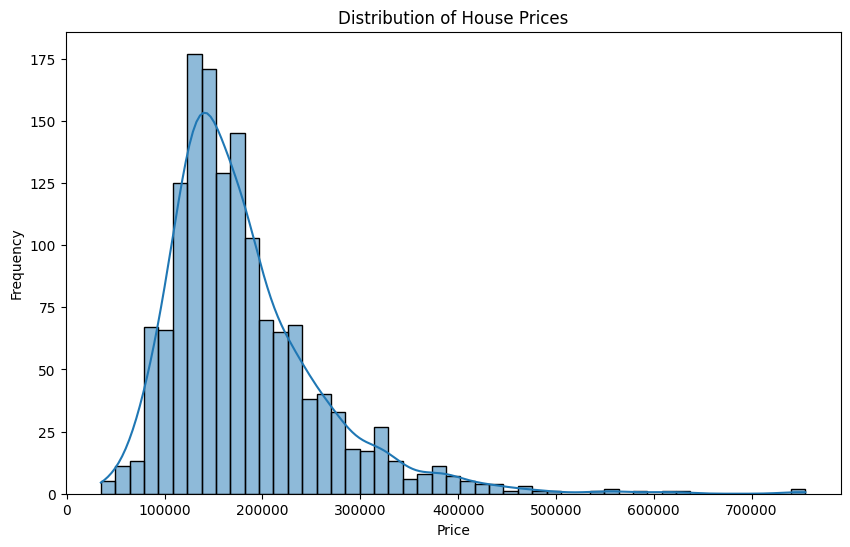

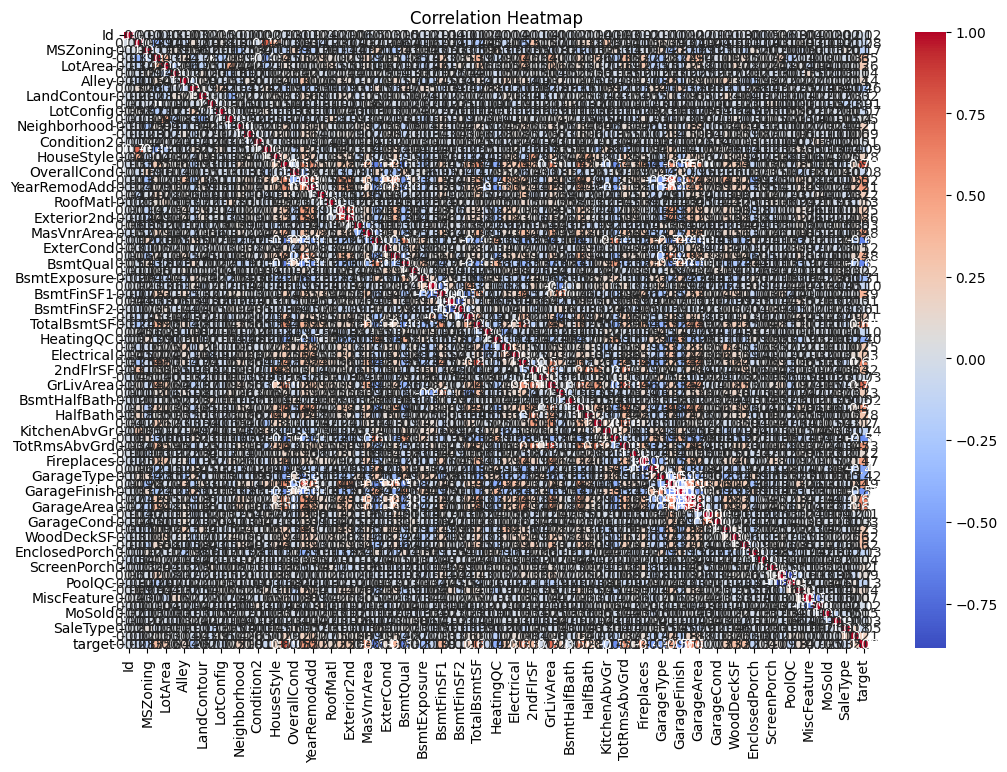

In [5]:
# Check for missing values
print(f"Missing Values: {df.isnull().sum()}")  # Check for missing values

# Visualize the distribution of house prices
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['target'], kde=True)  # Plot histogram with KDE (Kernel Density Estimate)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()  # Calculate correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")  # Visualize correlation matrix
plt.title("Correlation Heatmap")
plt.show()


# 4. Preprocessing and Feature Engineering
In this section, we will split the dataset into features (X) and the target variable (y),
and then normalize the features using StandardScaler.

In [6]:
# Split into features and target
X = df.drop('target', axis=1)  # Features (excluding target)
y = df['target']  # Target is the 'target' column (house price)

# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize the features

X_scaled[:5]  # Display the first 5 rows of the scaled features

array([[-1.73086488,  0.07337496, -0.04553194, -0.20803433, -0.20714171,
         0.06423821,  0.24471681,  0.75073056,  0.31466687, -0.02618016,
         0.60466978, -0.22571613, -1.20621453, -0.03628912, -0.03174026,
        -0.41169079,  1.02668924,  0.65147924, -0.51719981,  1.05099379,
         0.87866809, -0.49151573, -0.12579688,  0.96655586,  1.02525277,
        -1.21648536,  0.51001534, -0.77797579,  0.36420746,  0.83559903,
        -0.33983046,  0.23293722,  0.59190549, -0.43498906,  0.57542484,
         0.27284684, -0.28865283, -0.94459061, -0.45930254, -0.12304604,
        -0.88465767,  0.26381257,  0.30159884, -0.79343379,  1.16185159,
        -0.12024172,  0.37033344,  1.10781015, -0.24106104,  0.78974052,
         1.22758538,  0.16377912, -0.21145358, -0.40936914,  0.91220977,
         0.25597761, -0.95122649,  0.85464957, -0.76873633,  0.99242589,
        -0.31847458,  0.31172464,  0.35100032,  0.11211039,  0.06889955,
         0.28974476, -0.75217584,  0.21650316, -0.3

# 5. Model Definition (XGBoost)
In this section, we will use the **XGBoost** algorithm for regression.
We will define the XGBoost regressor and set up the model.

In [12]:
# Import necessary XGBoost library
import xgboost as xgb

# Define the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')


model

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# 6. Model Training
Now, we will train the XGBoost model. We will also track the training process.

In [11]:
!pip list

!pip install --upgrade xgboost scikit-learn


Package                            Version
---------------------------------- ------------
alembic                            1.14.1
annotated-types                    0.7.0
anyio                              4.9.0
asttokens                          3.0.0
backports.tarfile                  1.2.0
blinker                            1.9.0
build                              1.2.2.post1
CacheControl                       0.14.2
cachetools                         5.5.1
certifi                            2025.1.31
charset-normalizer                 3.4.1
cleo                               2.1.0
click                              8.1.8
cloudpickle                        3.1.1
cloup                              3.0.7
colorama                           0.4.6
comm                               0.2.2
contourpy                          1.3.0
crashtest                          0.4.1
cycler                             0.12.1
databricks-sdk                     0.44.1
debugpy                           

  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 5.5/124.9 MB 33.6 MB/s eta 0:00:04
   --- ------------------------------------ 12.1/124.9 MB 31.5 MB/s eta 0:00:04
   ------ --------------------------------- 18.9/124.9 MB 31.4 MB/s eta 0:00:04
   -------- ------------------------------- 25.7/124.9 MB 31.9 MB/s eta 0:00:04
   ---------- ----------------------------- 32.8/124.9 MB 32.0 MB/s eta 0:00:03
   ------------ --------------------------- 39.6/124.9 MB 31.9 MB/s eta 0:00:03
   -------------- ------------------------- 46.1/124.9 MB 31.9 MB/s eta 0:00:03
   ---------------- ----------------------- 52.4/124.9 MB 31.8 MB/s eta 0:00:03
   ------------------- -------------------- 59.5/124.9 MB 31.9 MB/s eta 0:00:03
   --------------------- ------------------ 66.1/124.9 MB 31.9 MB/s eta 0:00:02
   ----------------------- ---------------- 72.4/124.9 MB 32.0 MB/s eta 0:00:02
   ------------------------- -------------- 79.4/

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)  # Print training and test scores

# 7. Model Evaluation
In this section, we will evaluate the model on the test set using common metrics such as MAE, MSE, and R².
We will also plot the predicted vs actual values for the test set.

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print(f"MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, R²: {r2_test:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


# 8. Conclusions
The model has been trained and evaluated on the test set. The next steps would be to experiment with
different architectures or perform hyperparameter tuning to improve model performance.